In [11]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
import scipy.optimize as so
import plotly.express as px

In [12]:
# convert all csv files with our data to Pandas DataFrames
df = pd.read_csv('data.csv') # the data csv

# remove not a number values
df = df.dropna()

# show the dataframe
print(df)

    sec     mm^2  colonies
0     0  161.184       292
1    10  159.272       172
2    30  130.312       179
3    60   71.514       137
4    90   51.065        35
5   120  206.000       103
6   150   65.408       146
7   180    4.212       108
8   210  230.040        60
9   240  390.051       171
10  270  164.141       163
11  300  552.960       720
12  330  103.776       276
13  360  232.809       213
14  390  158.884       253
15  420  287.188       214
16  450  171.840       160
17    0  386.802       342
18   10  439.010       286
19   30  259.908       179
20   60  199.090       215
21   90  311.055        89
22  120  453.880       140
23  150  718.484       337
24  180  307.910       205


In [13]:
# turn the independent (x) and dependent (y) values on the table into numpy arrays 

# area vs time
x = np.array(df['sec']).reshape(-1, 1) # use .reshape(-1, 1) to format it 
y = np.array(df['mm^2']).reshape(-1, 1) # use .reshape(-1, 1) to format it 

# colonies vs time
x2 = np.array(df['sec']).reshape(-1, 1)
y2 = np.array(df['colonies']).reshape(-1, 1)

In [16]:
# fit the linear regression
reg = LinearRegression().fit(x, y)
reg2 = LinearRegression().fit(x2, y2)

# display relevant statistics
# Area
print("Area (mm^2) vs Time")
print("Coefficent of determination: ", reg.score(x, y)) # display the coefficient of determination (R squared)
print("Regression coefficient: ", reg.coef_[0, 0]) # display the slope of the regression line (regression coefficient)
print("Intercept of Regression Line: ", reg.intercept_[0])
dfc = pd.DataFrame(df.corr(method='pearson')) # convert the correlation coefficients to a dataframe 
print("Correlation coefficient: ", dfc.iat[0, 1]) # display the correlation coefficient (r) between the x and y variables

# Colonies
print("\n# of Colonies vs Time")
print("Coefficent of determination: ", reg2.score(x2, y2)) # display the coefficient of determination (R squared)
print("Regression coefficient: ", reg2.coef_[0, 0]) # display the slope of the regression line (regression coefficient)
print("Intercept of Regression Line: ", reg2.intercept_[0])
dfc2 = pd.DataFrame(df.corr(method='pearson')) # convert the correlation coefficients to a dataframe 
print("Correlation coefficient: ", dfc2.iat[0, 2]) # display the correlation coefficient (r) between the x and y variables

Area (mm^2) vs Time
Coefficent of determination:  0.0001643600569051218
Regression coefficient:  -0.015331328847771258
Intercept of Regression Line:  251.2781259041211
Correlation coefficient:  -0.012820298627756861

# of Colonies vs Time
Coefficent of determination:  0.020451799839928175
Regression coefficient:  0.13532380151387727
Intercept of Regression Line:  184.79495374264087
Correlation coefficient:  0.14300978931502656


In [17]:
# predict the y values
y_pred = reg.predict(x)
y2_pred = reg2.predict(x2)

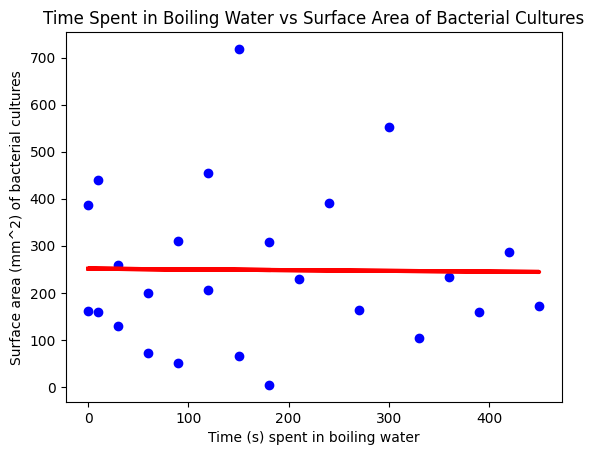

In [18]:
# Plot the model of the area data
plt.scatter(x, y, color="blue") # plot the data points as a scatter plot
plt.plot(x, y_pred, color="red", linewidth=3) # plot the line of best fit

plt.title("Time Spent in Boiling Water vs Surface Area of Bacterial Cultures") # display the title
plt.xlabel("Time (s) spent in boiling water") # label the x axis
plt.ylabel("Surface area (mm^2) of bacterial cultures") # label the y axis

plt.show() # display the graph

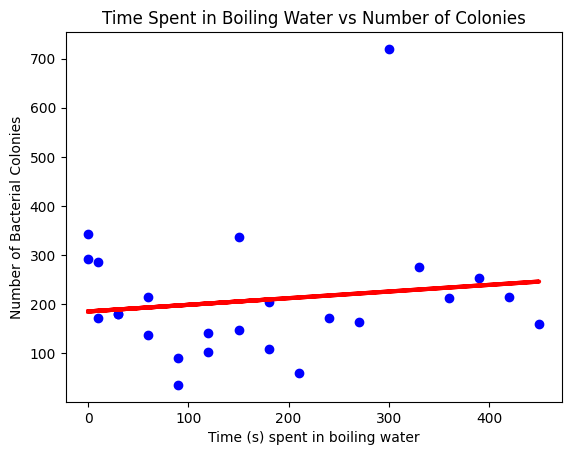

In [19]:
# Model of the colonies data
plt.scatter(x2, y2, color="blue") # plot the data points as a scatter plot
plt.plot(x2, y2_pred, color="red", linewidth=3) # plot the line of best fit

plt.title("Time Spent in Boiling Water vs Number of Colonies") # display the title
plt.xlabel("Time (s) spent in boiling water") # label the x axis
plt.ylabel("Number of Bacterial Colonies") # label the y axis

plt.show() # display the graph

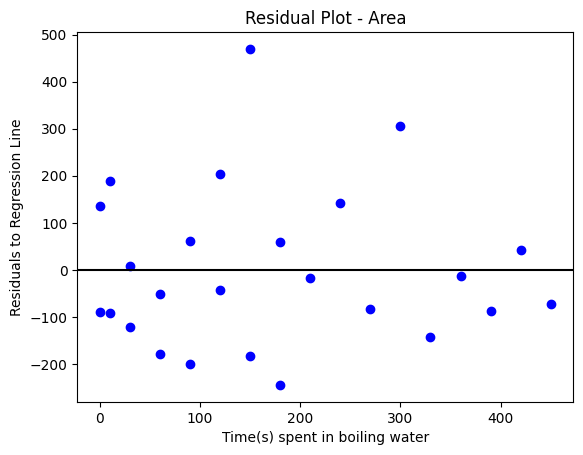

In [20]:
# Residual plots
# Area
plt.scatter(x, y-y_pred, color="blue") # 
plt.axhline(y=0, color="black",linestyle="-")

plt.title("Residual Plot - Area")
plt.xlabel("Time(s) spent in boiling water")
plt.ylabel("Residuals to Regression Line")

plt.show()

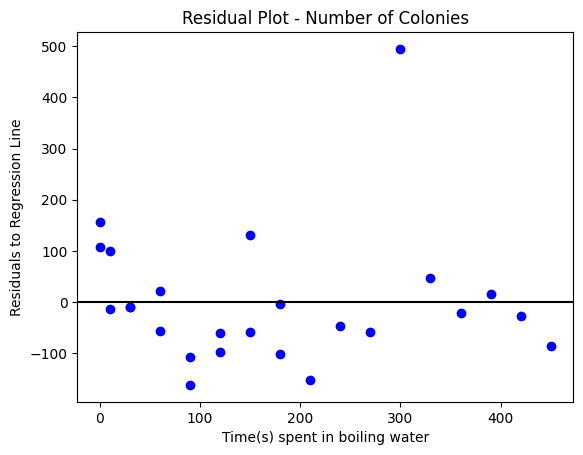

In [21]:
# Colonies
plt.scatter(x2, y2-y2_pred, color="blue") # 
plt.axhline(y=0, color="black",linestyle="-")

plt.title("Residual Plot - Number of Colonies")
plt.xlabel("Time(s) spent in boiling water")
plt.ylabel("Residuals to Regression Line")

plt.show()